# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# Reading the CSV file

In [2]:
df = pd.read_csv('tested.csv') 

In [3]:
df.shape

(418, 12)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Missing data

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Visualizing null values through Heatmap

<Axes: >

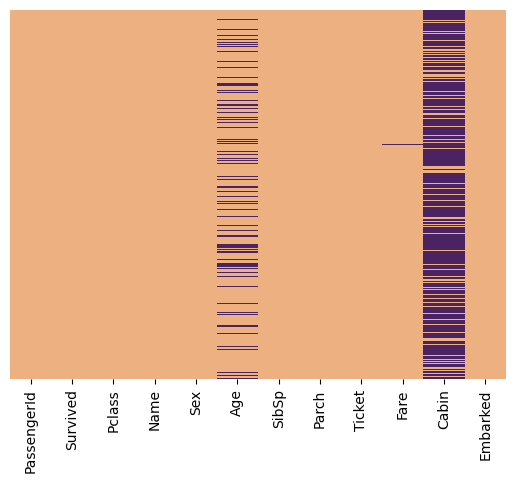

In [6]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='flare')

# Performing Exploratory Data Analysis (EDA)

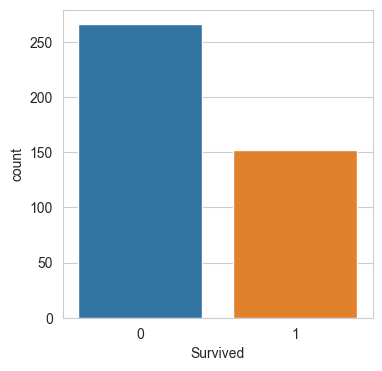

In [7]:
plt.figure(figsize=(4, 4)) 
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df)
plt.show()

# Only Females survived in this incident

<Axes: xlabel='Survived', ylabel='count'>

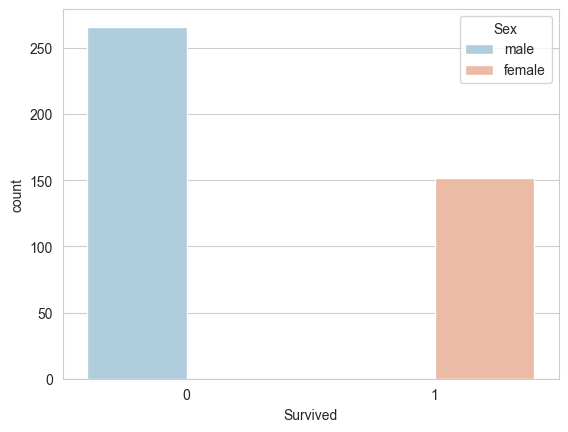

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=df,palette='RdBu_r')

# Most of the Individuals that survived belonged to Passenger Class 1 

<Axes: xlabel='Survived', ylabel='count'>

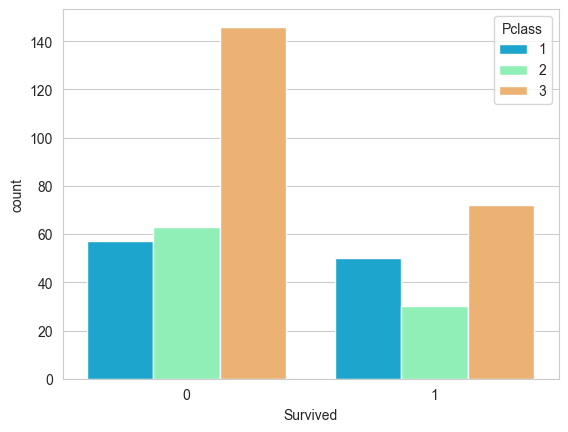

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df,palette='rainbow')

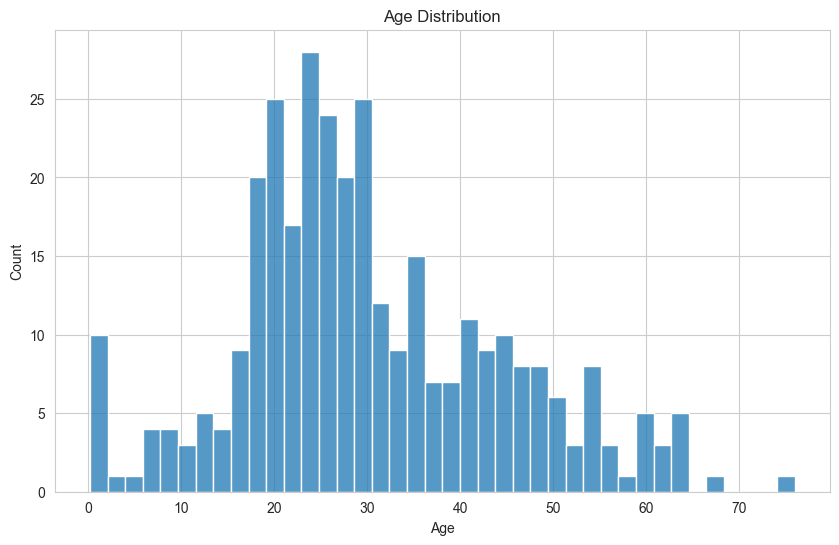

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df.Age.dropna(), kde=False, bins=40)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

# Individuals having siblings/spouse : most were single

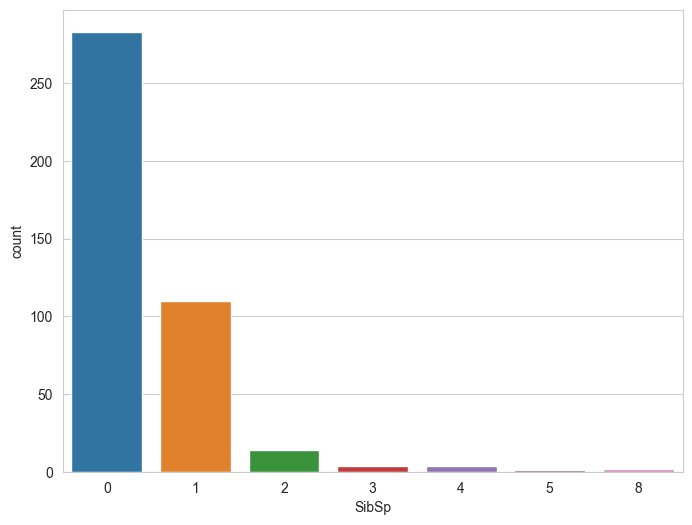

In [11]:
plt.figure(figsize=(8, 6)) 
sns.set_style('whitegrid')
sns.countplot(x='SibSp',data=df)
plt.show()

# Ticket fare distribution 

C:\Users\samri\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x400 with 0 Axes>

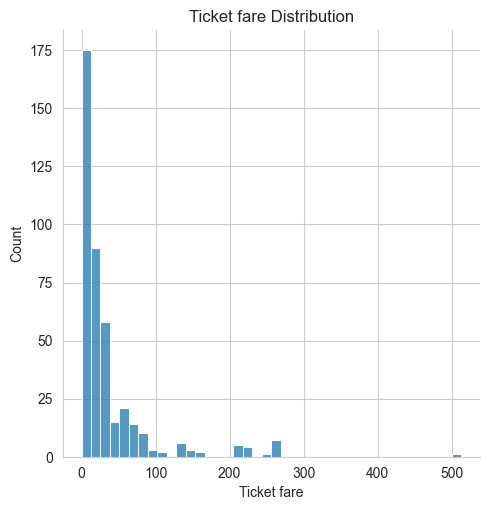

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.displot(df.Fare.dropna(), kde=False, bins=40)
plt.xlabel('Ticket fare')
plt.ylabel('Count')
plt.title('Ticket fare Distribution')
plt.show()


# Average age of each passanger class 

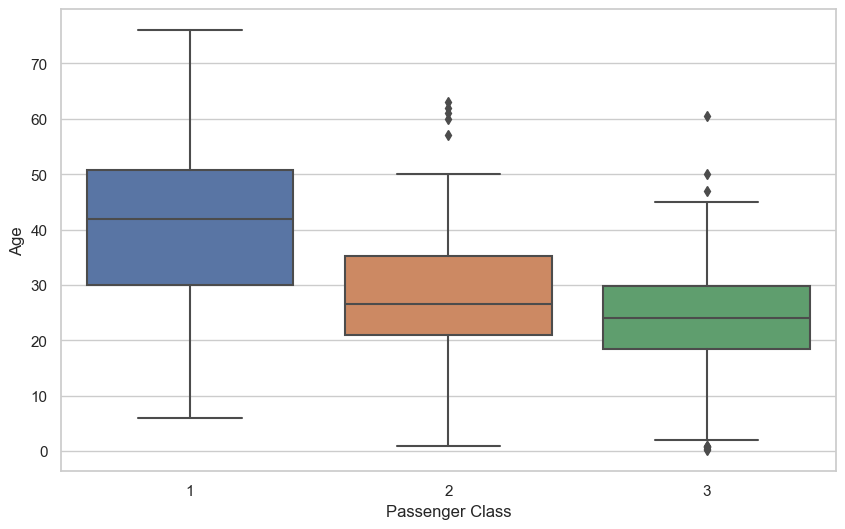

In [13]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6)) 
sns.boxplot(x='Pclass', y='Age', data=df)
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.show()

# Replacing missing values of age and fare of the passangers by the Average of age and fare of their respective classes

In [14]:
def replace_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return df[df['Pclass'] == 1]['Age'].mean()
        elif Pclass == 2:
            return df[df['Pclass'] == 2]['Age'].mean()
        else:
            return df[df['Pclass'] == 3]['Age'].mean()
    else:
        return Age

In [15]:
df['Age'] = df[['Age','Pclass']].apply(replace_age,axis =1)

In [16]:
def replace_fare(cols):
    Fare = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Fare):
        if Pclass == 1:
            return df[df['Pclass'] == 1]['Fare'].mean()
        elif Pclass == 2:
            return df[df['Pclass'] == 2]['Fare'].mean()
        else:
            return df[df['Pclass'] == 3]['Fare'].mean()
    else:
        return Fare

In [17]:
df['Fare'] = df[['Fare','Pclass']].apply(replace_fare,axis =1)

# Cabin : A Categorical Column has a large number of missing values, thus we Drop it

<Axes: >

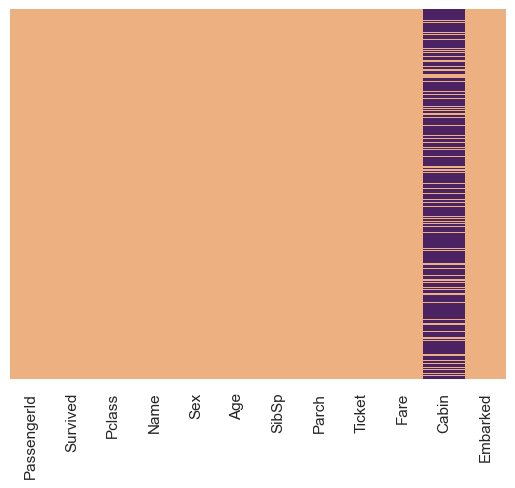

In [18]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='flare')

In [19]:
df.drop('Cabin',axis=1,inplace=True)

In [20]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


<Axes: >

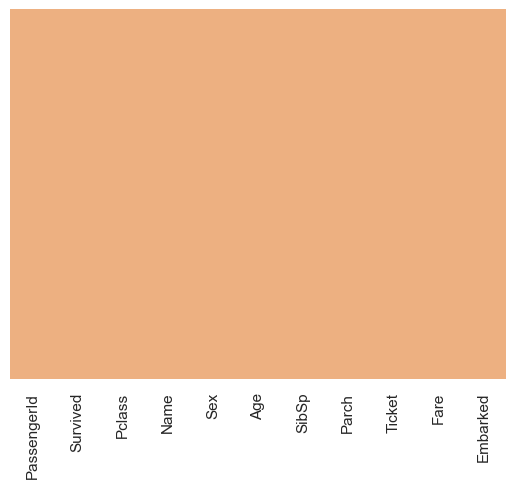

In [21]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='flare')

# Data Preprocessing : Converting Categorical data to Numerical data and dropping Non-Informative Features

In [22]:
sex = pd.get_dummies(df['Sex'],drop_first = True)
embarked = pd.get_dummies(df['Embarked'],drop_first = True)

In [23]:
df.drop(['Sex','Name','Ticket','Embarked','PassengerId'],axis=1,inplace=True)

In [24]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,34.5,0,0,7.8292
1,1,3,47.0,1,0,7.0000
2,0,2,62.0,0,0,9.6875
3,0,3,27.0,0,0,8.6625
4,1,3,22.0,1,1,12.2875


In [25]:
df = pd.concat([df,sex,embarked],axis=1)

In [26]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,34.5,0,0,7.8292,True,True,False
1,1,3,47.0,1,0,7.0000,False,False,True
2,0,2,62.0,0,0,9.6875,True,True,False
3,0,3,27.0,0,0,8.6625,True,False,True
4,1,3,22.0,1,1,12.2875,False,False,True


# Model Training and testing : Logistic Regression Model

In [27]:
from sklearn.model_selection import train_test_split
X = df.drop(columns = ['Survived'])               
Y = df['Survived']                
x_train, x_test, y_train, y_test = train_test_split(X , Y , test_size = 0.30, random_state = 0)        

In [28]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(x_train,y_train)


LogisticRegression(max_iter=1000)

In [29]:
predictions = log_model.predict(x_test)
predictions

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [30]:
from sklearn.metrics import confusion_matrix

In [31]:
accuracy = confusion_matrix (y_test,predictions)
accuracy

array([[71,  0],
       [ 0, 55]], dtype=int64)

# Accuracy Score

In [32]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score (y_test,predictions)
accuracy

1.0

In [33]:
predictions

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0], dtype=int64)